# Import Libraries

In [94]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from feature_engine.outliers import Winsorizer 
from scipy.stats import kendalltau, pearsonr 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler,RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder , FunctionTransformer
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error, classification_report, accuracy_score, confusion_matrix, roc_auc_score, f1_score 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold
from sklearn.utils import shuffle 
from sklearn.compose import ColumnTransformer, make_column_selector as selector 
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import SVC 
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor


In [95]:
# Mengabaikan semua peringatan
warnings.filterwarnings("ignore")

# Loading data

In [96]:
# Import data
df = pd.read_csv('../Data_Clean/balikpapan_clean.csv')
df

,harga,lokasi,luas_bangunan,luas_tanah,sertifikat,furnish,kamar_tidur,kamar_mandi,listrik,lantai
0,1650000,Balikpapan Selatan,180.0,141,SHM,Unfurnished,4,3,2200,2
1,2100000,Balikpapan Selatan,50.0,776,SHM,Unfurnished,3,1,900,1
2,1950000,Balikpapan Utara,139.7,206,SHM,Unfurnished,5,2,2200,1
3,1180000,Balikpapan Utara,47.0,78,SHM,Semi-furnished,2,2,1300,1
4,2500000,Balikpapan Baru,160.0,169,HGB,Unfurnished,4,3,4400,1
...,...,...,...,...,...,...,...,...,...,...
1569,500000,Balikpapan Selatan,42.0,84,HGB,Furnished,2,1,1300,1
1570,807000,Balikpapan Selatan,50.0,90,HGB,Unfurnished,3,2,2200,1
1571,480000,Balikpapan Selatan,48.0,72,SHM,Unfurnished,2,1,1300,1
1572,8500000,Balikpapan Baru,380.0,520,SHM,Unfurnished,4,2,6600,1


In [97]:
# Info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1574 entries, 0 to 1573
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   harga          1574 non-null   int64  
 1   lokasi         1574 non-null   object 
 2   luas_bangunan  1574 non-null   float64
 3   luas_tanah     1574 non-null   int64  
 4   sertifikat     1574 non-null   object 
 5   furnish        1574 non-null   object 
 6   kamar_tidur    1574 non-null   int64  
 7   kamar_mandi    1574 non-null   int64  
 8   listrik        1574 non-null   int64  
 9   lantai         1574 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 123.1+ KB


In [98]:
pd.set_option('display.max_colwidth', None)

cat_cols = list(df.select_dtypes(include='object').columns)

listItem = []
for col in cat_cols:
  listItem.append([col, df[col].nunique()])

pd.DataFrame(columns=['nama kolom', 'jumlah nilai unique'], data=listItem)

,nama kolom,jumlah nilai unique
0,lokasi,25
1,sertifikat,2
2,furnish,3


In [99]:
pd.set_option('display.max_colwidth', None)

cat_cols = (df.select_dtypes(include=['int64', 'float64']).columns)

listItem = []
for col in cat_cols:
    listItem.append([col, df[col].nunique()])

result_df = pd.DataFrame(listItem, columns=['nama kolom', 'jumlah nilai unique'])
result_df


,nama kolom,jumlah nilai unique
0,harga,290
1,luas_bangunan,230
2,luas_tanah,284
3,kamar_tidur,10
4,kamar_mandi,8
5,listrik,22
6,lantai,2


In [100]:
# print unique lokasi
df['lokasi'].unique()

array(['Balikpapan Selatan', 'Balikpapan Utara', 'Balikpapan Baru',
       'Damai', 'Karang Rejo', 'Sepinggan', 'Gunung Bahagia',
       'Balikpapan Tengah', 'Balikpapan Timur', 'Batu Ampar',
       'Balikpapan Barat', 'Muara Rapak', 'Lamaru', 'Telaga Sari',
       'Manggar', 'Karang Jati', 'Kariangau', 'Gn. Samarinda',
       'Sumber Rejo', 'Klandasan Ulu', 'Klandasan Ilir', 'Prapatan',
       'Batakan', 'Gn. Sari Ilir', 'Balikpapan Kota'], dtype=object)

In [101]:
# check min max value of all numeric column
df.describe()

,harga,luas_bangunan,luas_tanah,kamar_tidur,kamar_mandi,listrik,lantai
count,1.574000e+03,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000,1574.000000
mean,1.990419e+06,165.968742,219.142948,3.389454,2.346887,2841.677255,1.213469
std,1.792939e+06,121.133668,199.580171,1.279270,1.158895,2552.149783,0.409886
min,1.250000e+05,8.000000,36.000000,0.000000,0.000000,900.000000,1.000000
25%,8.550000e+05,88.000000,120.000000,2.000000,2.000000,1300.000000,1.000000
50%,1.500000e+06,130.000000,162.000000,3.000000,2.000000,2200.000000,1.000000
75%,2.500000e+06,212.250000,243.000000,4.000000,3.000000,3500.000000,1.000000
max,1.500000e+07,1270.000000,4300.000000,9.000000,7.000000,53000.000000,2.000000


# Feature Engineering

## Split

In [102]:
X = df.drop(['harga'], axis = 1)
y = df['harga']
X

,lokasi,luas_bangunan,luas_tanah,sertifikat,furnish,kamar_tidur,kamar_mandi,listrik,lantai
0,Balikpapan Selatan,180.0,141,SHM,Unfurnished,4,3,2200,2
1,Balikpapan Selatan,50.0,776,SHM,Unfurnished,3,1,900,1
2,Balikpapan Utara,139.7,206,SHM,Unfurnished,5,2,2200,1
3,Balikpapan Utara,47.0,78,SHM,Semi-furnished,2,2,1300,1
4,Balikpapan Baru,160.0,169,HGB,Unfurnished,4,3,4400,1
...,...,...,...,...,...,...,...,...,...
1569,Balikpapan Selatan,42.0,84,HGB,Furnished,2,1,1300,1
1570,Balikpapan Selatan,50.0,90,HGB,Unfurnished,3,2,2200,1
1571,Balikpapan Selatan,48.0,72,SHM,Unfurnished,2,1,1300,1
1572,Balikpapan Baru,380.0,520,SHM,Unfurnished,4,2,6600,1


In [103]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=40)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=40)

print('x Train Size: ', X_train.shape)
print('x Validation Size: ', X_val.shape)
print('x Test Size: ', X_test.shape)
print('y Train Size: ', y_train.shape)
print('y Validation Size: ', y_val.shape)
print('y Test Size: ', y_test.shape)


x Train Size:  (944, 9)
x Validation Size:  (378, 9)
x Test Size:  (252, 9)
y Train Size:  (944,)
y Validation Size:  (378,)
y Test Size:  (252,)


In [104]:
num_cols = (X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, X_train[col].skew()])

pd.DataFrame(columns=['nama kolom', 'nilai skewness'], data= listItem)


,nama kolom,nilai skewness
0,luas_bangunan,2.675401
1,luas_tanah,9.159306
2,kamar_tidur,1.150917
3,kamar_mandi,0.995643
4,listrik,7.988892
5,lantai,1.336794


In [105]:
kolom = df.columns
kolom

Index(['harga', 'lokasi', 'luas_bangunan', 'luas_tanah', 'sertifikat',
       'furnish', 'kamar_tidur', 'kamar_mandi', 'listrik', 'lantai'],
      dtype='object')

In [106]:
# First, capping the normal distribution

winsoriser_age = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1,
                            variables=['kamar_tidur','kamar_mandi','luas_tanah','luas_bangunan','listrik'],
                            missing_values='ignore')

X_train_capped = winsoriser_age.fit_transform(X_train)
X_val_capped = winsoriser_age.transform(X_val)
X_test_capped = winsoriser_age.transform(X_test)

In [107]:
num_cols = (X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in num_cols:
  listItem.append([col, X_train[col].skew()])

pd.DataFrame(columns=['nama kolom', 'nilai skewness'], data=listItem)


,nama kolom,nilai skewness
0,luas_bangunan,2.675401
1,luas_tanah,9.159306
2,kamar_tidur,1.150917
3,kamar_mandi,0.995643
4,listrik,7.988892
5,lantai,1.336794


In [108]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

luas_bangunan - Before Capping


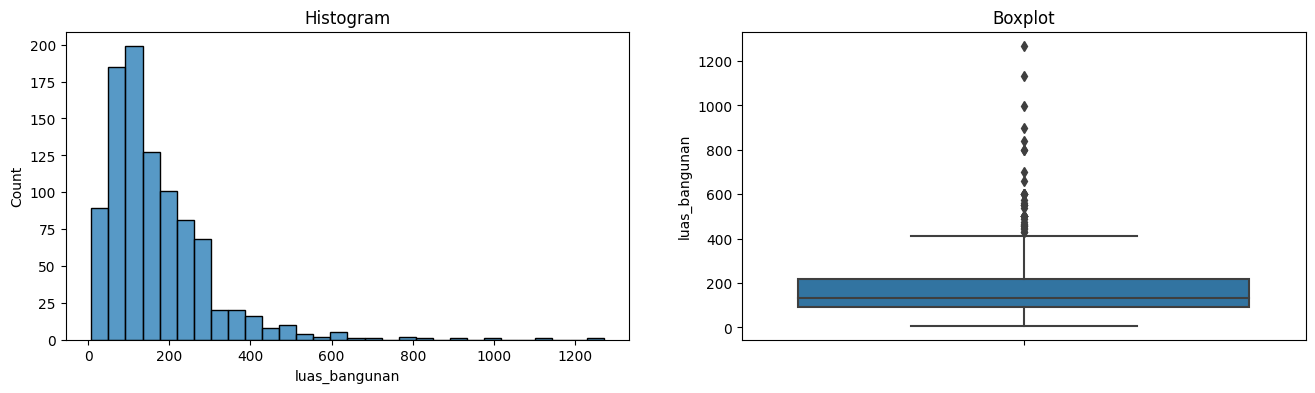


luas_bangunan - After Capping


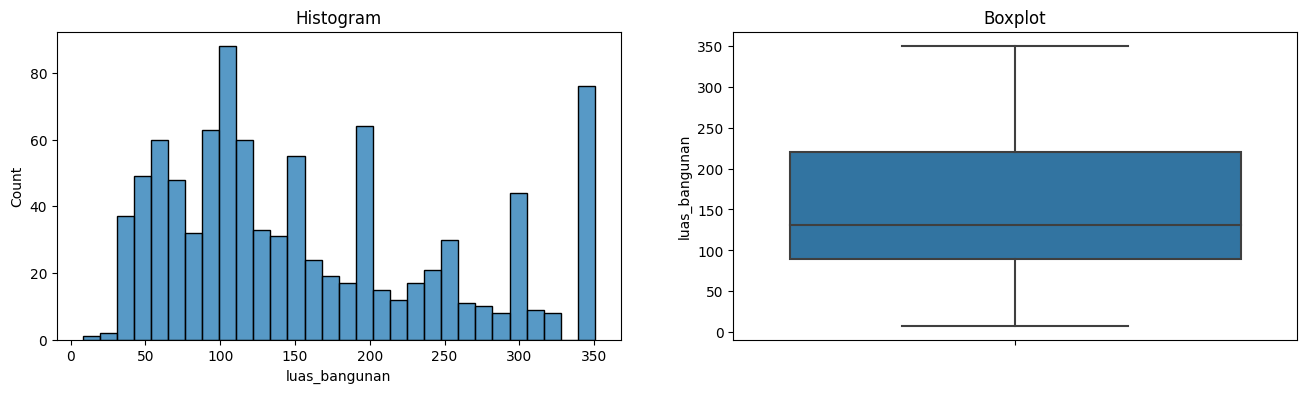

luas_tanah - Before Capping


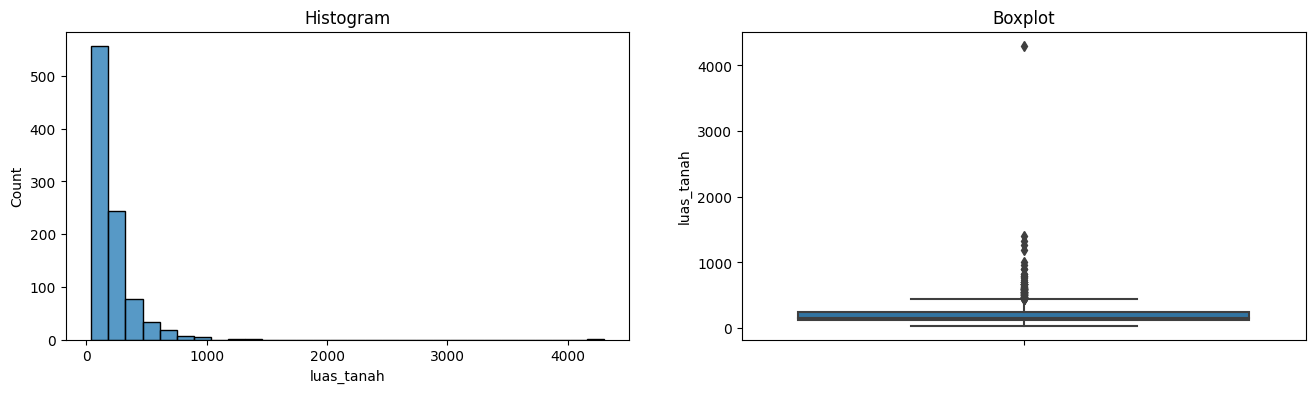


luas_tanah - After Capping


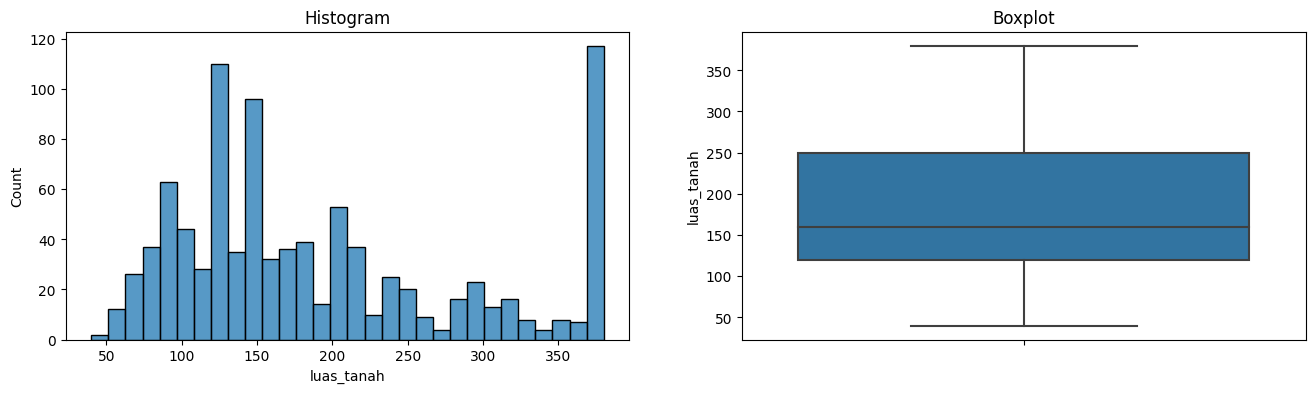

kamar_tidur - Before Capping


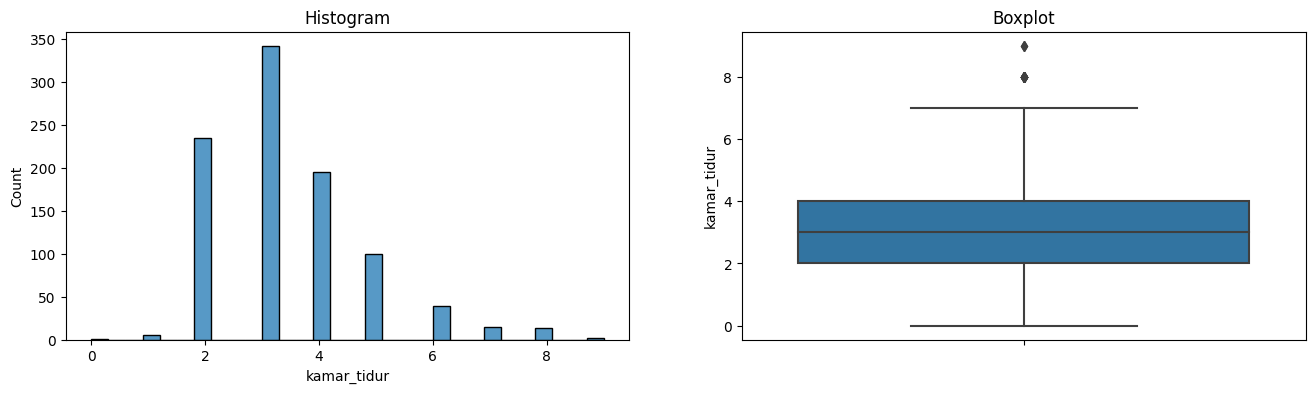


kamar_tidur - After Capping


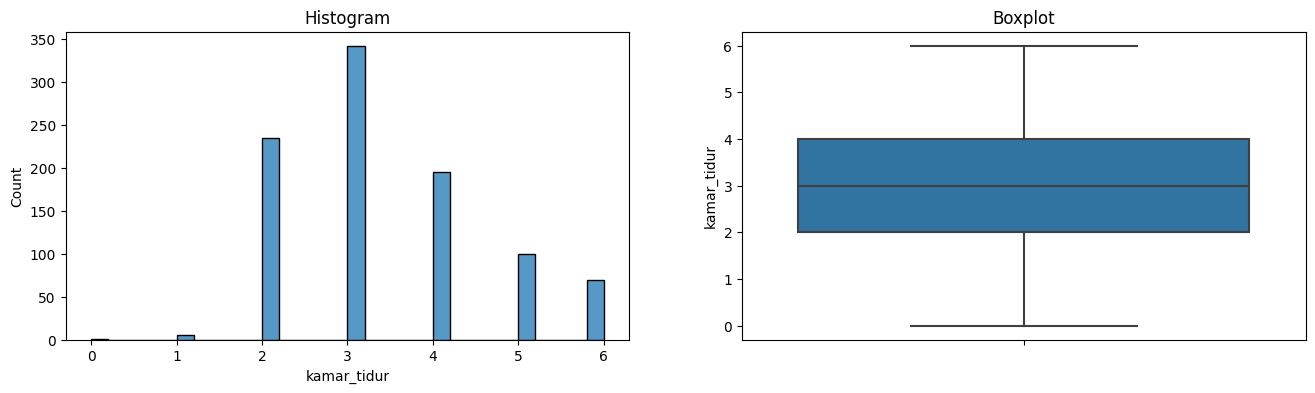

kamar_mandi - Before Capping


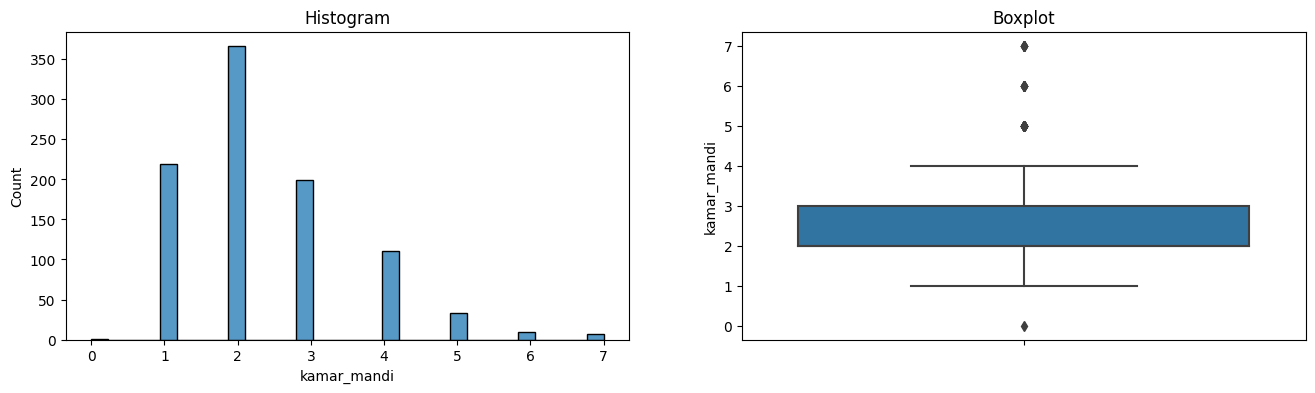


kamar_mandi - After Capping


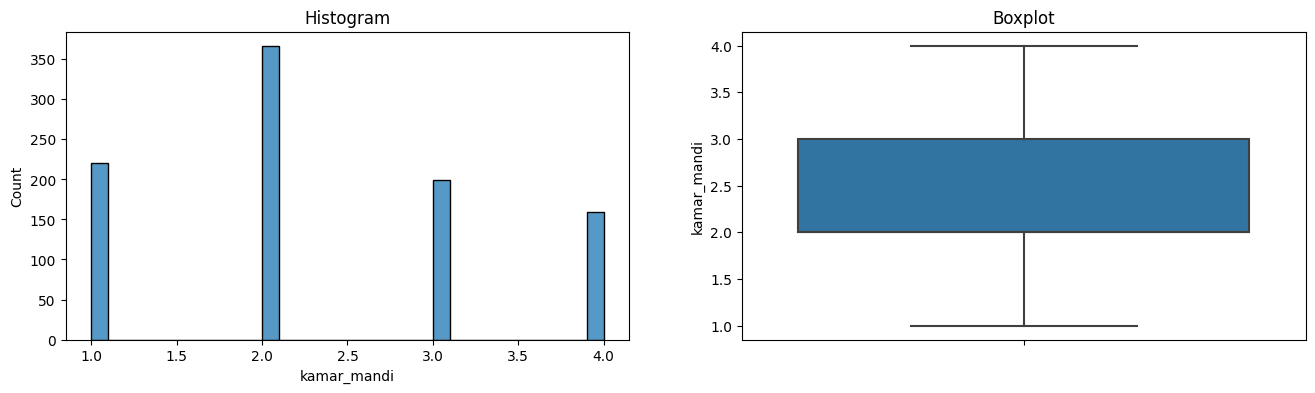

listrik - Before Capping


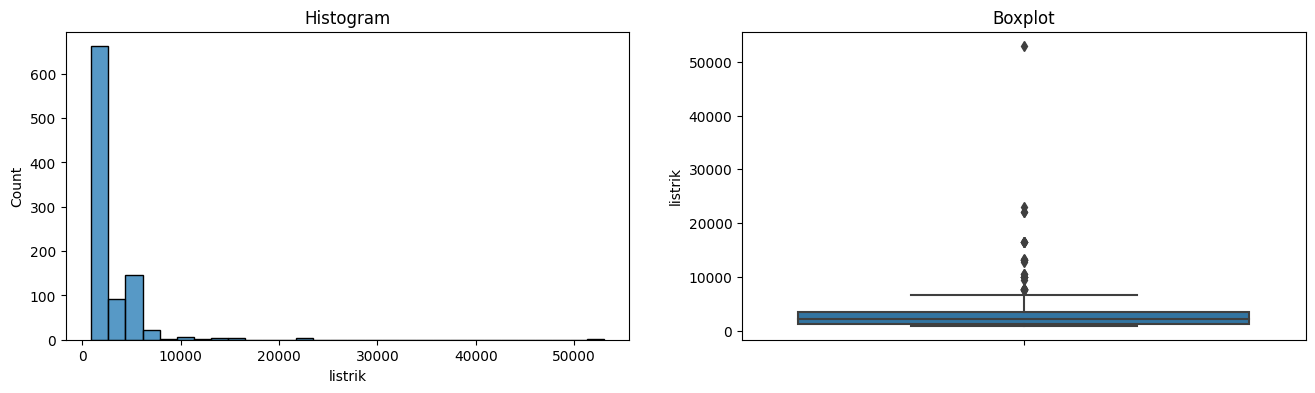


listrik - After Capping


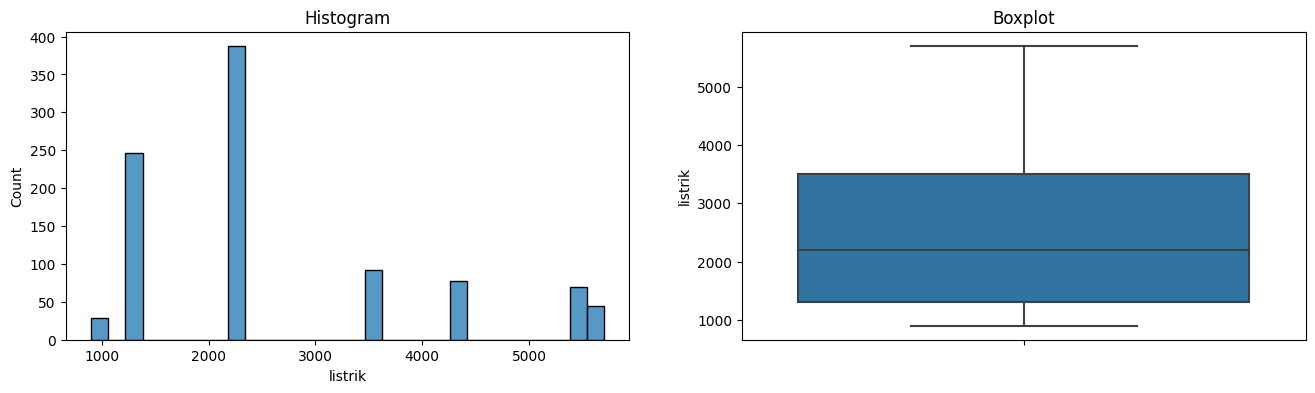

lantai - Before Capping


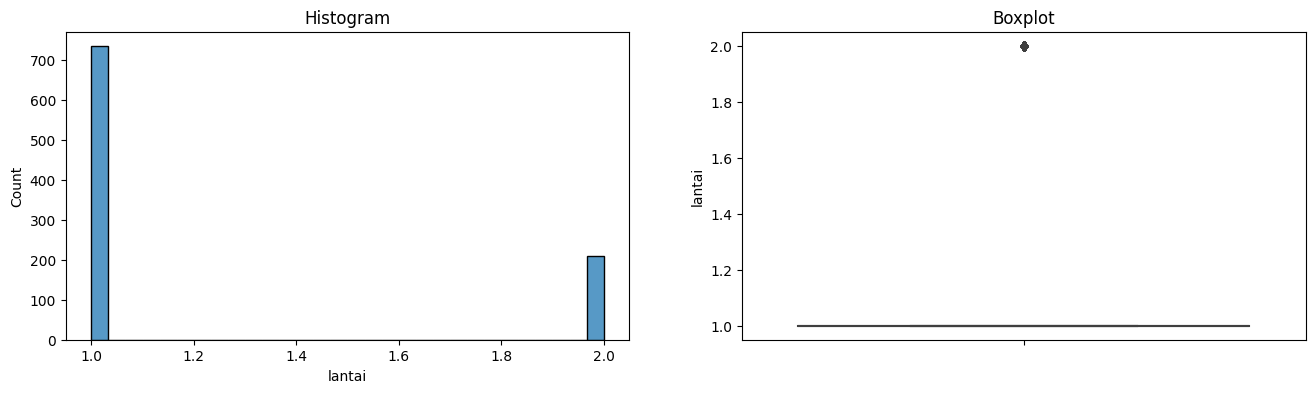


lantai - After Capping


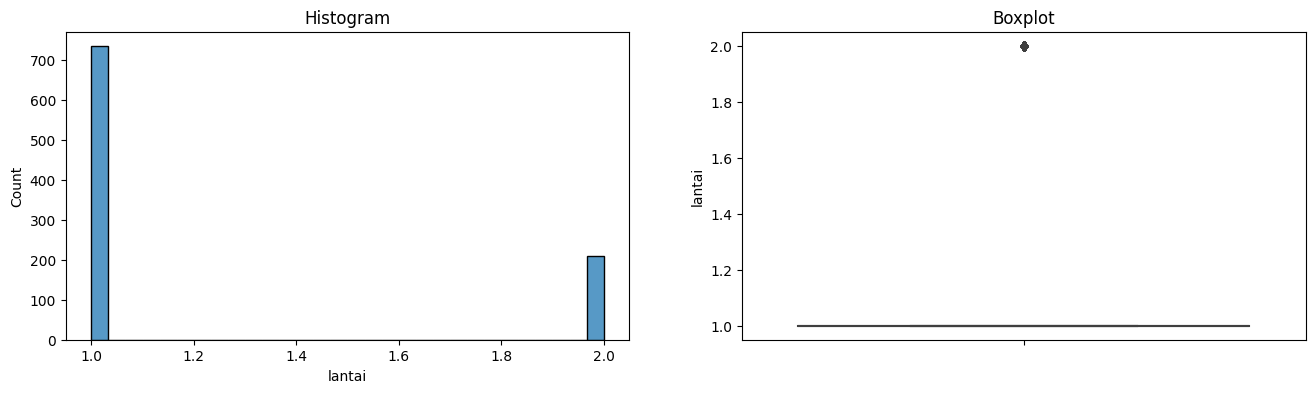

In [109]:
# Check the distribution before and after capping
for col in num_cols:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)

In [110]:
X_train

,lokasi,luas_bangunan,luas_tanah,sertifikat,furnish,kamar_tidur,kamar_mandi,listrik,lantai
1430,Balikpapan Selatan,60.0,96,SHM,Unfurnished,2,1,1300,1
1078,Balikpapan Selatan,234.0,135,SHM,Unfurnished,5,3,1300,2
1366,Balikpapan Utara,274.0,137,SHM,Unfurnished,5,3,3500,2
488,Balikpapan Selatan,200.0,299,SHM,Unfurnished,4,2,3500,1
1365,Balikpapan Selatan,45.0,78,SHM,Unfurnished,2,1,1300,1
...,...,...,...,...,...,...,...,...,...
1016,Balikpapan Selatan,207.0,144,SHM,Unfurnished,5,3,2200,2
165,Balikpapan Baru,300.0,220,HGB,Unfurnished,4,2,2200,2
7,Balikpapan Selatan,68.0,120,SHM,Semi-furnished,3,1,2200,1
219,Balikpapan Tengah,280.0,460,SHM,Unfurnished,5,3,3500,1


In [111]:
num_columns = X_train.select_dtypes(include = np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist()

print('Numeric Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numeric Columns:  ['luas_bangunan', 'luas_tanah', 'kamar_tidur', 'kamar_mandi', 'listrik', 'lantai']
Categorical Columns:  ['lokasi', 'sertifikat', 'furnish']


In [112]:
# Split numerical columns and categorical columns

X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]
X_val_num = X_val[num_columns]
X_val_cat = X_val[cat_columns]
X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]


In [113]:
X_train_num

,luas_bangunan,luas_tanah,kamar_tidur,kamar_mandi,listrik,lantai
1430,60.0,96,2,1,1300,1
1078,234.0,135,5,3,1300,2
1366,274.0,137,5,3,3500,2
488,200.0,299,4,2,3500,1
1365,45.0,78,2,1,1300,1
...,...,...,...,...,...,...
1016,207.0,144,5,3,2200,2
165,300.0,220,4,2,2200,2
7,68.0,120,3,1,2200,1
219,280.0,460,5,3,3500,1


In [114]:
X_train_cat

,lokasi,sertifikat,furnish
1430,Balikpapan Selatan,SHM,Unfurnished
1078,Balikpapan Selatan,SHM,Unfurnished
1366,Balikpapan Utara,SHM,Unfurnished
488,Balikpapan Selatan,SHM,Unfurnished
1365,Balikpapan Selatan,SHM,Unfurnished
...,...,...,...
1016,Balikpapan Selatan,SHM,Unfurnished
165,Balikpapan Baru,HGB,Unfurnished
7,Balikpapan Selatan,SHM,Semi-furnished
219,Balikpapan Tengah,SHM,Unfurnished


In [115]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = pearsonr(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'p_value':p_values,
              'hasil': interpretasi})


,nama kolom,p_value,hasil
0,luas_bangunan,6.035653e-176,ada korelasi
1,luas_tanah,1.971400e-84,ada korelasi
2,kamar_tidur,1.221694e-46,ada korelasi
3,kamar_mandi,1.660289e-79,ada korelasi
4,listrik,1.542245e-45,ada korelasi
5,lantai,6.197765e-05,ada korelasi


In [116]:
# Feature selection Kategorical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'p_value':p_values,
              'hasil': interpretasi})


,nama kolom,p_value,hasil
0,lokasi,4.997987e-10,ada korelasi
1,sertifikat,4.300361e-04,ada korelasi
2,furnish,7.623912e-01,ga ada korelasi


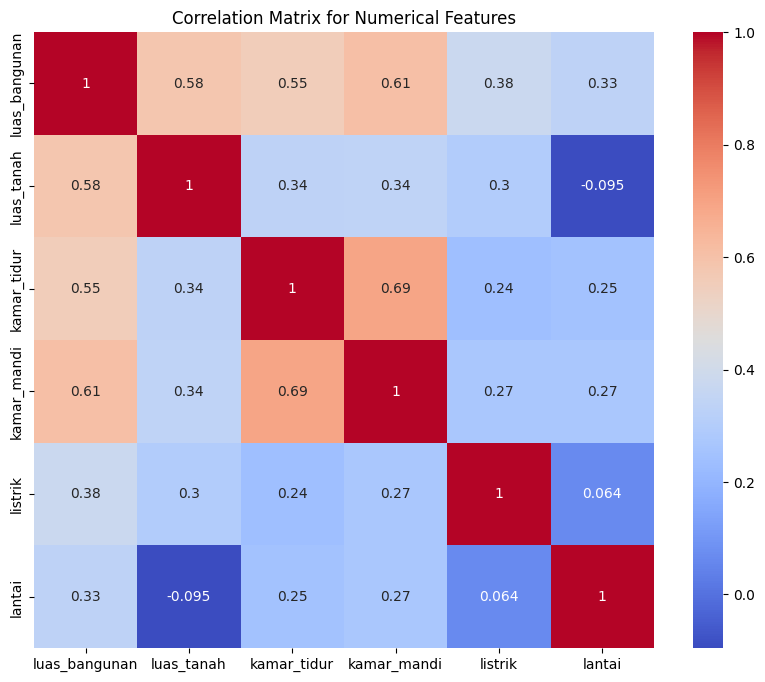

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = X_train_num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Features')
plt.show()


## Manual scalling & encoding

In [118]:
# # One-Hot Encoding untuk kolom 'lokasi' dan 'sertifikat'
# X_train_encoded = pd.get_dummies(X_train_cat, columns=['lokasi', 'sertifikat'], drop_first=True)
# X_val_encoded = pd.get_dummies(X_val_cat, columns=['lokasi', 'sertifikat'], drop_first=True)
# X_test_encoded = pd.get_dummies(X_test_cat, columns=['lokasi', 'sertifikat'], drop_first=True)


In [119]:
# # Menyelaraskan kolom agar konsisten antara train, val, dan test set
# X_train_encoded, X_val_encoded = X_train_encoded.align(X_val_encoded, join='left', axis=1, fill_value=0)
# X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

In [120]:
# # Definisikan urutan kategori untuk kolom 'furnish'
# furnish_order = ['Unfurnished', 'Semi-furnished', 'Furnished']

# # Buat objek OrdinalEncoder dengan kategori yang telah ditentukan
# ordinal_encoder = OrdinalEncoder(categories=[furnish_order])

# # Ordinal Encoding untuk kolom 'furnish'
# X_train_encoded['furnish'] = ordinal_encoder.fit_transform(X_train[['furnish']])
# X_val_encoded['furnish'] = ordinal_encoder.transform(X_val[['furnish']])
# X_test_encoded['furnish'] = ordinal_encoder.transform(X_test[['furnish']])

In [121]:
# X_train_encoded.info()

In [122]:
# # Pastikan semua kolom sudah di encode
# X_train_final = pd.concat([X_train_num, X_train_encoded], axis=1)
# X_val_final = pd.concat([X_val_num, X_val_encoded], axis=1)
# X_test_final = pd.concat([X_test_num, X_test_encoded], axis=1)

In [123]:
# X_train_final.info()

In [124]:
# X_train_final

In [125]:
# X_val_final

In [126]:
# X_test_final

# Define Model

In [127]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import BaseEstimator, TransformerMixin

# # Custom transformer for interaction features
# class InteractionFeatures(BaseEstimator, TransformerMixin):
#     def fit(self, X, y=None):
#         return self
    
#     def transform(self, X):
#         X = X.copy()
#         # Create interaction features
#         X['bangunan_tanah'] = X['luas_bangunan'] * X['luas_tanah']
#         return X

# Function to apply log transformation
log_transformer = FunctionTransformer(np.log1p, validate=True)

# Urutan kategori untuk kolom 'furnish'
furnish_order = ['Unfurnished', 'Semi-furnished', 'Furnished']

# Daftar kolom numerik
num_columns = ['luas_bangunan', 'luas_tanah', 'kamar_tidur', 'kamar_mandi', 'listrik', 'lantai']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        # Log Transform, Feature Interactions, and Scaling kolom numerik
        ('log_interaction_scaler', Pipeline(steps=[
            ('interaction', InteractionFeatures()),  # Add interaction features
            ('log', log_transformer),                # Log transformation
            ('scaler', StandardScaler())             # Standard scaling
        ]), num_columns),
        # One-Hot Encoding untuk 'lokasi' dan 'sertifikat'
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), ['lokasi', 'sertifikat']),
        # Ordinal Encoding untuk 'furnish'
        ('ordinal', OrdinalEncoder(categories=[furnish_order]), ['furnish'])
    ]
)

# Model pipelines
lgbm_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(
        num_leaves=31,         
        learning_rate=0.05,     
        n_estimators=500,       
        max_depth=-1,          
        random_state=42))
])

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=1000,      
        max_depth=6,            
        learning_rate=0.01,    
        subsample=0.8,          
        colsample_bytree=0.8,  
        random_state=42))
])

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=500,         
        max_depth=10,             
        min_samples_split=5,     
        min_samples_leaf=2,       
        max_features='sqrt',      
        random_state=42))
])

linear_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(
        max_depth=10,            
        min_samples_split=10,    
        min_samples_leaf=5,      
        random_state=42))
])

svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(
        kernel='rbf',     
        C=100,            
        epsilon=0.01))    
])

lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(
        alpha=0.01,         
        max_iter=10000,     
        random_state=42))
])

gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(
        loss='huber',           
        learning_rate=0.01,     
        n_estimators=1000,      
        max_depth=4,            
        min_samples_split=5,    
        min_samples_leaf=3,     
        subsample=0.8,          
        random_state=42))
])

ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(
        alpha=1.0,         
        fit_intercept=True, 
        solver='auto',     
        random_state=42))
])

knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(
        n_neighbors=10,     
        weights='distance', 
        algorithm='auto',   
        p=2))               
])

# List of pipelines to evaluate
pipelines = [
    ('LightGBM', lgbm_pipeline),
    ('XGBoost', xgb_pipeline),
    ('Random Forest', rf_pipeline),
    ('Linear Regression', linear_reg_pipeline),
    ('Decision Tree', dt_pipeline),
    ('SVR', svr_pipeline),
    ('Lasso Regression', lasso_pipeline),
    ('Gradient Boosting', gb_pipeline),
    ('Ridge Regression', ridge_pipeline),
    ('K-Nearest Neighbors', knn_pipeline)
]

# Evaluate models using cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
results = []

for name, pipeline in pipelines:
    print(f"Evaluating {name}...")
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='r2', n_jobs=-1)
    print(f"{name} Average R2: {np.mean(cv_scores):.4f}")
    results.append({
        'Model': name,
        'Average R2': np.mean(cv_scores)
    })

# Display cross-validation results
results_df = pd.DataFrame(results)

results_df


Evaluating LightGBM...
LightGBM Average R2: 0.6549
Evaluating XGBoost...
XGBoost Average R2: 0.6811
Evaluating Random Forest...
Random Forest Average R2: 0.6849
Evaluating Linear Regression...
Linear Regression Average R2: 0.5533
Evaluating Decision Tree...
Decision Tree Average R2: 0.5303
Evaluating SVR...
SVR Average R2: -0.0739
Evaluating Lasso Regression...
Lasso Regression Average R2: 0.5854
Evaluating Gradient Boosting...
Gradient Boosting Average R2: 0.6953
Evaluating Ridge Regression...
Ridge Regression Average R2: 0.5784
Evaluating K-Nearest Neighbors...
K-Nearest Neighbors Average R2: 0.6729


,Model,Average R2
0,LightGBM,0.654915
1,XGBoost,0.681107
2,Random Forest,0.684919
3,Linear Regression,0.553321
4,Decision Tree,0.530257
5,SVR,-0.073918
6,Lasso Regression,0.585401
7,Gradient Boosting,0.695271
8,Ridge Regression,0.578354
9,K-Nearest Neighbors,0.672934


In [128]:
# LGBM
lgbm_pipeline.fit(X_train, y_train)
predictions = lgbm_pipeline.predict(X_test)
print('Training Score: ',round(lgbm_pipeline.score(X_train, y_train),4))
print('Testing Score: ', round(lgbm_pipeline.score(X_test, y_test),4))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 944, number of used features: 15
[LightGBM] [Info] Start training from score 1980977.189619
Training Score:  0.9568
Testing Score:  0.7342


In [129]:
# XGBoost Regressor
xgb_pipeline.fit(X_train, y_train)
predictions_xgb = xgb_pipeline.predict(X_test)
print('XGBoost Training Score: ', round(xgb_pipeline.score(X_train, y_train), 4))
print('XGBoost Testing Score: ', round(xgb_pipeline.score(X_test, y_test), 4))


XGBoost Training Score:  0.9762
XGBoost Testing Score:  0.7268


In [130]:
# Random Forest Regressor
rf_pipeline.fit(X_train, y_train)
predictions_rf = rf_pipeline.predict(X_test)
print('Random Forest Training Score: ', round(rf_pipeline.score(X_train, y_train), 4))
print('Random Forest Testing Score: ', round(rf_pipeline.score(X_test, y_test), 4))


Random Forest Training Score:  0.8309
Random Forest Testing Score:  0.6859


In [131]:
# Linear Regression
linear_reg_pipeline.fit(X_train, y_train)
predictions_linear_reg = linear_reg_pipeline.predict(X_test)
print('Linear Regression Training Score: ', round(linear_reg_pipeline.score(X_train, y_train), 4))
print('Linear Regression Testing Score: ', round(linear_reg_pipeline.score(X_test, y_test), 4))


Linear Regression Training Score:  0.6539
Linear Regression Testing Score:  0.6514


In [132]:
# Decision Tree Regressor
dt_pipeline.fit(X_train, y_train)
predictions_dt = dt_pipeline.predict(X_test)
print('Decision Tree Training Score: ', round(dt_pipeline.score(X_train, y_train), 4))
print('Decision Tree Testing Score: ', round(dt_pipeline.score(X_test, y_test), 4))


Decision Tree Training Score:  0.8226
Decision Tree Testing Score:  0.6112


In [133]:
# Support Vector Machine Regressor
svr_pipeline.fit(X_train, y_train)
predictions_svr = svr_pipeline.predict(X_test)
print('SVR Training Score: ', round(svr_pipeline.score(X_train, y_train), 4))
print('SVR Testing Score: ', round(svr_pipeline.score(X_test, y_test), 4))


SVR Training Score:  -0.0681
SVR Testing Score:  -0.0757


In [134]:
# Lasso Regression
lasso_pipeline.fit(X_train, y_train)
predictions_lasso = lasso_pipeline.predict(X_test)
print('Lasso Training Score: ', round(lasso_pipeline.score(X_train, y_train), 4))
print('Lasso Testing Score: ', round(lasso_pipeline.score(X_test, y_test), 4))


Lasso Training Score:  0.6178
Lasso Testing Score:  0.605


In [135]:
# Gradient Boosting Regressor
gb_pipeline.fit(X_train, y_train)
predictions_gb = gb_pipeline.predict(X_test)
print('Gradient Boosting Training Score: ', round(gb_pipeline.score(X_train, y_train), 4))
print('Gradient Boosting Testing Score: ', round(gb_pipeline.score(X_test, y_test), 4))


Gradient Boosting Training Score:  0.8947
Gradient Boosting Testing Score:  0.6917


In [136]:
# Ridge Regression
ridge_pipeline.fit(X_train, y_train)
predictions_ridge = ridge_pipeline.predict(X_test)
print('Ridge Training Score: ', round(ridge_pipeline.score(X_train, y_train), 4))
print('Ridge Testing Score: ', round(ridge_pipeline.score(X_test, y_test), 4))


Ridge Training Score:  0.6047
Ridge Testing Score:  0.5932


In [137]:
# K-Nearest Neighbors Regressor
knn_pipeline.fit(X_train, y_train)
predictions_knn = knn_pipeline.predict(X_test)
print('KNN Training Score: ', round(knn_pipeline.score(X_train, y_train), 4))
print('KNN Testing Score: ', round(knn_pipeline.score(X_test, y_test), 4))


KNN Training Score:  0.9995
KNN Testing Score:  0.6795


In [138]:
import pandas as pd

# List untuk menyimpan hasil
model_names = []
training_scores = []
testing_scores = []

# Fungsi untuk melatih model dan mengumpulkan hasil
def evaluate_model(pipeline, model_name):
    # Melatih model
    pipeline.fit(X_train, y_train)
    
    # Mendapatkan skor
    train_score = pipeline.score(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)
    
    # Menyimpan hasil
    model_names.append(model_name)
    training_scores.append(round(train_score, 4))
    testing_scores.append(round(test_score, 4))
    
    print(f'{model_name} Training Score: {train_score:.4f}')
    print(f'{model_name} Testing Score: {test_score:.4f}')

# Evaluasi setiap model
evaluate_model(lgbm_pipeline, 'LightGBM')
evaluate_model(xgb_pipeline, 'XGBoost')
evaluate_model(rf_pipeline, 'Random Forest')
evaluate_model(linear_reg_pipeline, 'Linear Regression')
evaluate_model(dt_pipeline, 'Decision Tree')
evaluate_model(svr_pipeline, 'SVR')
evaluate_model(lasso_pipeline, 'Lasso Regression')
evaluate_model(gb_pipeline, 'Gradient Boosting')
evaluate_model(ridge_pipeline, 'Ridge Regression')
evaluate_model(knn_pipeline, 'K-Nearest Neighbors')

# Membuat DataFrame dari hasil
results_df = pd.DataFrame({
    'Model': model_names,
    'Training Score': training_scores,
    'Testing Score': testing_scores
})


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 944, number of used features: 15
[LightGBM] [Info] Start training from score 1980977.189619
LightGBM Training Score: 0.9568
LightGBM Testing Score: 0.7342
XGBoost Training Score: 0.9762
XGBoost Testing Score: 0.7268
Random Forest Training Score: 0.8309
Random Forest Testing Score: 0.6859
Linear Regression Training Score: 0.6539
Linear Regression Testing Score: 0.6514
Decision Tree Training Score: 0.8226
Decision Tree Testing Score: 0.6112
SVR Training Score: -0.0681
SVR Testing Score: -0.0757
Lasso Regression Training Score: 0.6178
Lasso Regression Testing Score: 0.6050
Gradient Boosting Training Score: 0.8947
Gradient Boosting Testing Score: 0.6917
Ridge Regression Training Score: 0.6047
Ridge Regression Testing Score: 0.5932
K-Nearest 

In [139]:
# Menampilkan DataFrame
print("\nComparison of Model Performance:")
display(results_df)


Comparison of Model Performance:


,Model,Training Score,Testing Score
0,LightGBM,0.9568,0.7342
1,XGBoost,0.9762,0.7268
2,Random Forest,0.8309,0.6859
3,Linear Regression,0.6539,0.6514
4,Decision Tree,0.8226,0.6112
5,SVR,-0.0681,-0.0757
6,Lasso Regression,0.6178,0.6050
7,Gradient Boosting,0.8947,0.6917
8,Ridge Regression,0.6047,0.5932
9,K-Nearest Neighbors,0.9995,0.6795


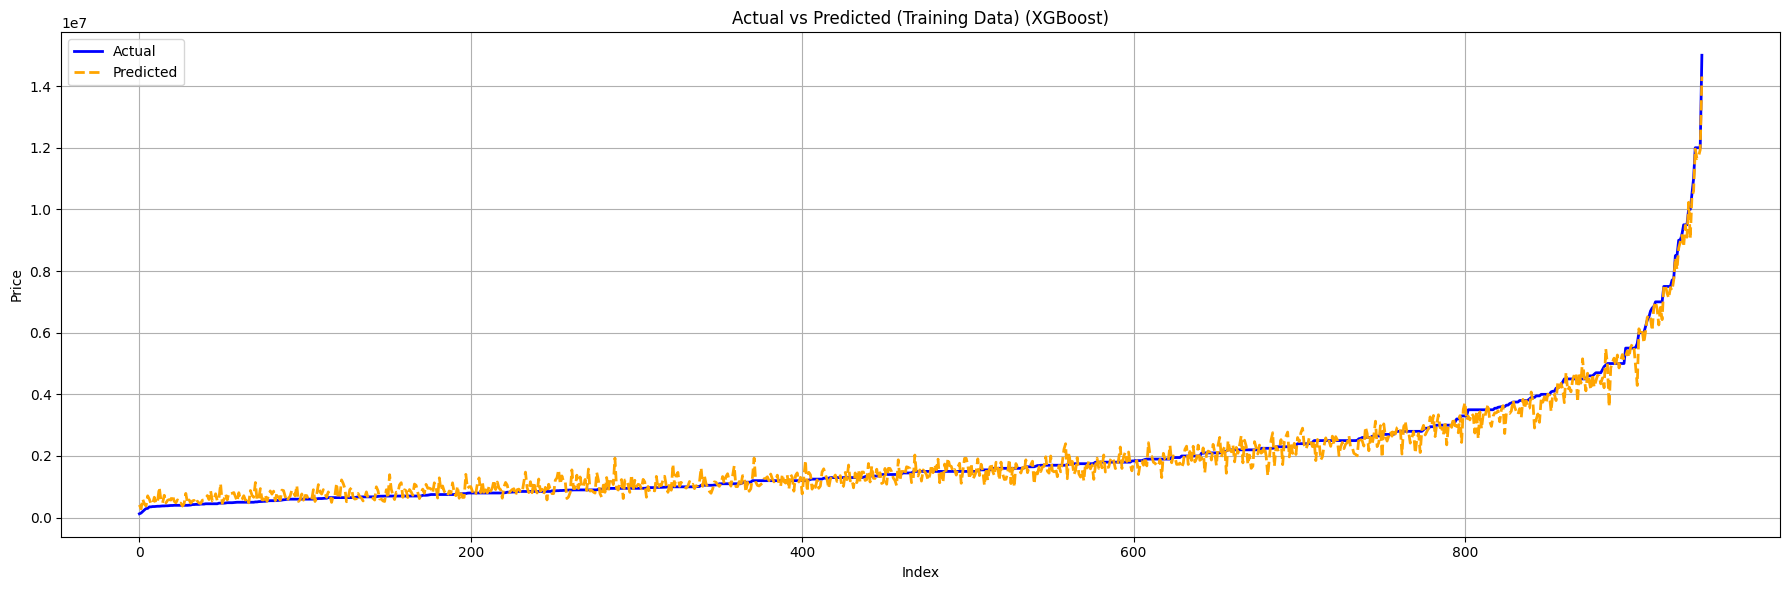

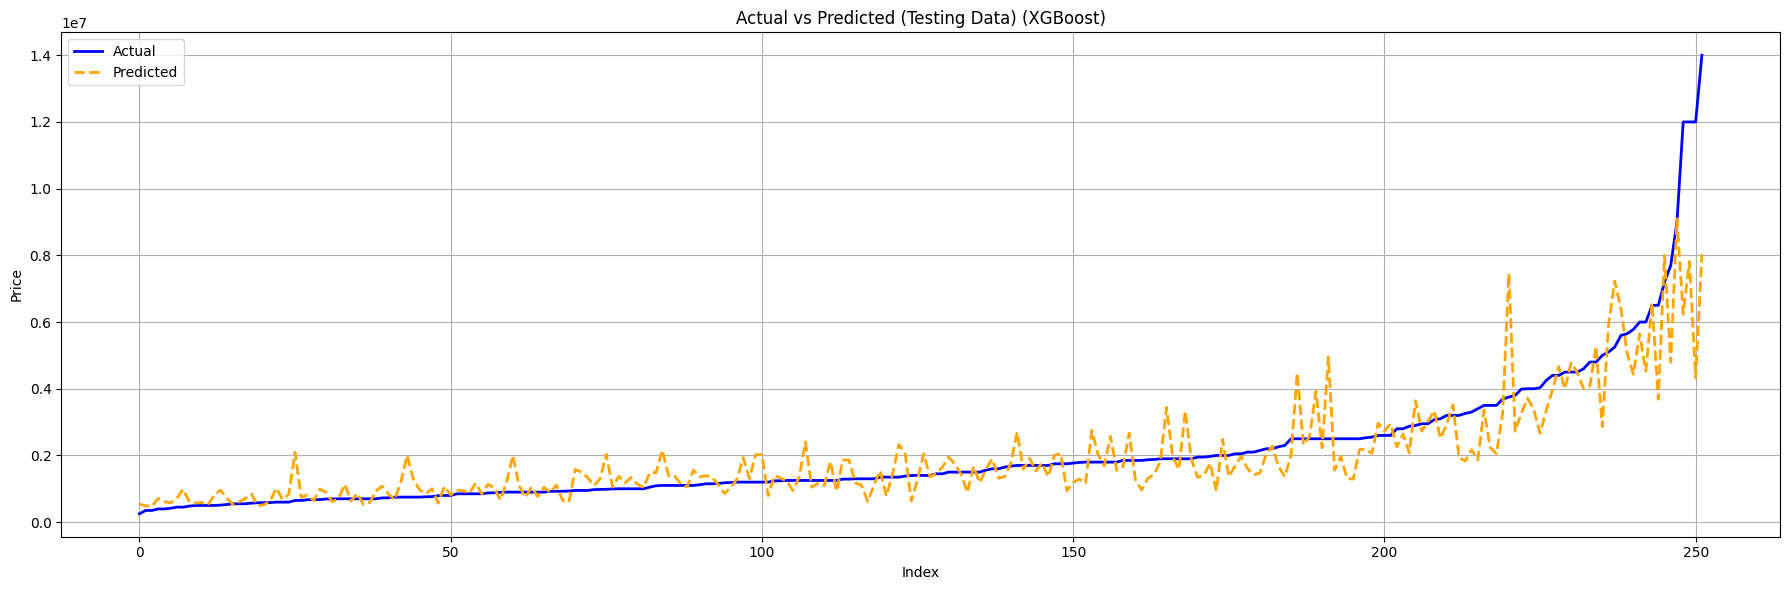

In [140]:
# Melatih model XGBoost
xgb_pipeline.fit(X_train, y_train)

# Mendapatkan prediksi
y_train_pred = xgb_pipeline.predict(X_train)
y_test_pred = xgb_pipeline.predict(X_test)

# Fungsi untuk mengubah data menjadi numpy array dan mengurutkannya
def sort_data(y_actual, y_pred):
    # Convert to numpy arrays if they're not already
    y_actual_np = np.array(y_actual)
    y_pred_np = np.array(y_pred)

    # Sort the data based on actual values for plotting
    sorted_indices = np.argsort(y_actual_np)
    return y_actual_np[sorted_indices], y_pred_np[sorted_indices]

# Fungsi untuk membuat line chart
def plot_line_chart(y_actual, y_pred, title, y_label='Price'):
    y_actual_sorted, y_pred_sorted = sort_data(y_actual, y_pred)

    plt.figure(figsize=(18, 6))
    plt.plot(y_actual_sorted, label='Actual', color='b', linewidth=2)
    plt.plot(y_pred_sorted, label='Predicted', color='orange', linestyle='--', linewidth=2)
    plt.xlabel('Index')
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Visualisasi data pelatihan
plot_line_chart(y_train, y_train_pred, 'Actual vs Predicted (Training Data) (XGBoost)')

# Visualisasi data pengujian
plot_line_chart(y_test, y_test_pred, 'Actual vs Predicted (Testing Data) (XGBoost)')


# Hyperparameter tuning

In [142]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define parameter grid for LightGBM in the pipeline
lgbm_param_grid = {
    'regressor__n_estimators': [100, 200, 300, 500],
    'regressor__max_depth': [3, 5, 7, 10],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__num_leaves': [20, 31, 40],
    'regressor__min_child_samples': [10, 20, 30],
    'regressor__subsample': [0.8, 0.9, 1.0],
    'regressor__colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize KFold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV with the pipeline and parameter grid
random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm_pipeline,
    param_distributions=lgbm_param_grid,
    n_iter=100,  # Number of random combinations to try
    scoring='r2',
    cv=kf,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the randomized search to the training data
random_search_lgbm.fit(X_train, y_train)

# Retrieve the best parameters and best score
best_lgbm_params = random_search_lgbm.best_params_
best_lgbm_score = random_search_lgbm.best_score_

print("Best LightGBM Parameters (Randomized Search):", best_lgbm_params)
print("Best LightGBM R2 Score (Randomized Search):", best_lgbm_score)

# Evaluate the best model on the validation/test data
y_val_pred = random_search_lgbm.best_estimator_.predict(X_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print(f'Validation MAE: {val_mae:.4f}, Validation RMSE: {val_rmse:.4f}, Validation R2: {val_r2:.4f}')

# Evaluate on test data (if needed)
y_test_pred = random_search_lgbm.best_estimator_.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f'Test MAE: {test_mae:.4f}, Test RMSE: {test_rmse:.4f}, Test R2: {test_r2:.4f}')


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 944, number of used features: 15
[LightGBM] [Info] Start training from score 1980977.189619
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [143]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define parameter grid for XGBoost
xgb_param_grid = {
    'regressor__n_estimators': [100, 200, 300, 500],
    'regressor__max_depth': [3, 5, 7, 10],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__subsample': [0.7, 0.8, 0.9, 1.0],
    'regressor__colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'regressor__gamma': [0, 0.1, 0.2, 0.3],
    'regressor__reg_alpha': [0, 0.01, 0.1],  # L1 regularization
    'regressor__reg_lambda': [1, 1.5, 2]    # L2 regularization
}

# Initialize KFold for cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV for XGBoost
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=xgb_param_grid,
    n_iter=50,  # Number of random combinations to try
    scoring='r2',
    cv=kf,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the randomized search to the training data
random_search_xgb.fit(X_train, y_train)

# Best parameters and score
best_xgb_params = random_search_xgb.best_params_
best_xgb_score = random_search_xgb.best_score_

print("Best XGBoost Parameters (Randomized Search):", best_xgb_params)
print("Best XGBoost R2 Score (Randomized Search):", best_xgb_score)

# Evaluate on test data
y_test_pred_xgb = random_search_xgb.best_estimator_.predict(X_test)
test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

print(f'XGBoost Test MAE: {test_mae_xgb:.4f}, Test RMSE: {test_rmse_xgb:.4f}, Test R2: {test_r2_xgb:.4f}')


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best XGBoost Parameters (Randomized Search): {'regressor__subsample': 0.8, 'regressor__reg_lambda': 1.5, 'regressor__reg_alpha': 0, 'regressor__n_estimators': 200, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.05, 'regressor__gamma': 0.3, 'regressor__colsample_bytree': 0.9}
Best XGBoost R2 Score (Randomized Search): 0.6880719304084778
XGBoost Test MAE: 564356.1842, Test RMSE: 1033458.1195, Test R2: 0.7232


In [144]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define parameter grid for Random Forest
rf_param_grid = {
    'regressor__n_estimators': [100, 200, 300, 500],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10, 15],
    'regressor__min_samples_leaf': [1, 2, 4, 6],
    'regressor__max_features': ['auto', 'sqrt', 'log2'],
    'regressor__bootstrap': [True, False]  # Explore both bootstrap options
}

# Initialize KFold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_param_grid,
    scoring='r2',
    cv=kf,
    n_jobs=-1,
    verbose=2
)

# Fit the grid search to the training data
grid_search_rf.fit(X_train, y_train)

# Best parameters and score
best_rf_params = grid_search_rf.best_params_
best_rf_score = grid_search_rf.best_score_

print("Best Random Forest Parameters:", best_rf_params)
print("Best Random Forest R2 Score:", best_rf_score)

# Evaluate on test data
y_test_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print(f'Random Forest Test MAE: {test_mae_rf:.4f}, Test RMSE: {test_rmse_rf:.4f}, Test R2: {test_r2_rf:.4f}')


Fitting 5 folds for each of 1536 candidates, totalling 7680 fits
Best Random Forest Parameters: {'regressor__bootstrap': True, 'regressor__max_depth': 20, 'regressor__max_features': 'log2', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}
Best Random Forest R2 Score: 0.7078019848510253
Random Forest Test MAE: 563488.2018, Test RMSE: 1091516.3141, Test R2: 0.6912


In [145]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define parameter grid for Gradient Boosting
gb_param_grid = {
    'regressor__n_estimators': [100, 200, 300, 500],
    'regressor__max_depth': [3, 5, 7, 10],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__subsample': [0.8, 0.9, 1.0]
}

# Initialize KFold for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV for Gradient Boosting
random_search_gb = RandomizedSearchCV(
    estimator=gb_pipeline,
    param_distributions=gb_param_grid,
    n_iter=50,  # Number of random combinations to try
    scoring='r2',
    cv=kf,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the randomized search to the training data
random_search_gb.fit(X_train, y_train)

# Best parameters and score
best_gb_params = random_search_gb.best_params_
best_gb_score = random_search_gb.best_score_

print("Best Gradient Boosting Parameters (Randomized Search):", best_gb_params)
print("Best Gradient Boosting R2 Score (Randomized Search):", best_gb_score)

# Evaluate on test data
y_test_pred_gb = random_search_gb.best_estimator_.predict(X_test)
test_mae_gb = mean_absolute_error(y_test, y_test_pred_gb)
test_rmse_gb = np.sqrt(mean_squared_error(y_test, y_test_pred_gb))
test_r2_gb = r2_score(y_test, y_test_pred_gb)

print(f'Gradient Boosting Test MAE: {test_mae_gb:.4f}, Test RMSE: {test_rmse_gb:.4f}, Test R2: {test_r2_gb:.4f}')


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Gradient Boosting Parameters (Randomized Search): {'regressor__subsample': 0.8, 'regressor__n_estimators': 300, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 1, 'regressor__max_depth': 3, 'regressor__learning_rate': 0.05}
Best Gradient Boosting R2 Score (Randomized Search): 0.6872805215475755
Gradient Boosting Test MAE: 577212.7033, Test RMSE: 1125265.1989, Test R2: 0.6719


In [146]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define parameter grid for XGBoost
xgb_param_grid = {
    'regressor__n_estimators': [100, 200, 300, 500],
    'regressor__max_depth': [3, 5, 7, 10],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__subsample': [0.7, 0.8, 0.9, 1.0],
    'regressor__colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'regressor__gamma': [0, 0.1, 0.2, 0.3],
    'regressor__reg_alpha': [0, 0.01, 0.1],  # L1 regularization
    'regressor__reg_lambda': [1, 1.5, 2]    # L2 regularization
}

# Initialize KFold for cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Initialize RandomizedSearchCV for XGBoost
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_pipeline,
    param_distributions=xgb_param_grid,
    n_iter=50,  # Number of random combinations to try
    scoring='r2',
    cv=kf,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the randomized search to the training data
random_search_xgb.fit(X_train, y_train)

# Best parameters and score
best_xgb_params = random_search_xgb.best_params_
best_xgb_score = random_search_xgb.best_score_

print("Best XGBoost Parameters (Randomized Search):", best_xgb_params)
print("Best XGBoost R2 Score (Randomized Search):", best_xgb_score)

# Evaluate on test data
y_test_pred_xgb = random_search_xgb.best_estimator_.predict(X_test)
test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

print(f'XGBoost Test MAE: {test_mae_xgb:.4f}, Test RMSE: {test_rmse_xgb:.4f}, Test R2: {test_r2_xgb:.4f}')


Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best XGBoost Parameters (Randomized Search): {'regressor__subsample': 0.8, 'regressor__reg_lambda': 1.5, 'regressor__reg_alpha': 0, 'regressor__n_estimators': 200, 'regressor__max_depth': 5, 'regressor__learning_rate': 0.05, 'regressor__gamma': 0.3, 'regressor__colsample_bytree': 0.9}
Best XGBoost R2 Score (Randomized Search): 0.6880719304084778
XGBoost Test MAE: 564356.1842, Test RMSE: 1033458.1195, Test R2: 0.7232


In [147]:
# Fungsi untuk menghitung metrik evaluasi
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Predict on training data
    y_train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Predict on test data
    y_test_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    return train_r2, test_r2, train_mae, train_rmse, test_mae, test_rmse

# Evaluasi model sebelum tuning
def evaluate_initial_models():
    initial_results = []

    # LightGBM tanpa tuning
    lgbm_initial = LGBMRegressor(random_state=42)
    lgbm_initial_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', lgbm_initial)
    ])
    lgbm_initial_pipeline.fit(X_train, y_train)
    initial_results.append(('LightGBM Initial', *evaluate_model(lgbm_initial_pipeline, X_train, y_train, X_test, y_test)))

    # XGBoost tanpa tuning
    xgb_initial = XGBRegressor(random_state=42)
    xgb_initial_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', xgb_initial)
    ])
    xgb_initial_pipeline.fit(X_train, y_train)
    initial_results.append(('XGBoost Initial', *evaluate_model(xgb_initial_pipeline, X_train, y_train, X_test, y_test)))

    # Random Forest tanpa tuning
    rf_initial = RandomForestRegressor(random_state=42)
    rf_initial_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', rf_initial)
    ])
    rf_initial_pipeline.fit(X_train, y_train)
    initial_results.append(('Random Forest Initial', *evaluate_model(rf_initial_pipeline, X_train, y_train, X_test, y_test)))

    # Gradient Boosting tanpa tuning
    gb_initial = GradientBoostingRegressor(random_state=42)
    gb_initial_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', gb_initial)
    ])
    gb_initial_pipeline.fit(X_train, y_train)
    initial_results.append(('Gradient Boosting Initial', *evaluate_model(gb_initial_pipeline, X_train, y_train, X_test, y_test)))

    return initial_results

# Evaluasi model setelah tuning
def evaluate_tuned_models():
    tuned_results = []

    # Mengambil model terbaik setelah tuning
    tuned_results.append(('LightGBM Tuned', *evaluate_model(random_search_lgbm.best_estimator_, X_train, y_train, X_test, y_test)))
    tuned_results.append(('XGBoost Tuned', *evaluate_model(random_search_xgb.best_estimator_, X_train, y_train, X_test, y_test)))
    tuned_results.append(('Random Forest Tuned', *evaluate_model(grid_search_rf.best_estimator_, X_train, y_train, X_test, y_test)))
    tuned_results.append(('Gradient Boosting Tuned', *evaluate_model(random_search_gb.best_estimator_, X_train, y_train, X_test, y_test)))

    return tuned_results

# Menggabungkan hasil evaluasi sebelum dan sesudah tuning
initial_results = evaluate_initial_models()
tuned_results = evaluate_tuned_models()

# Membuat DataFrame untuk membandingkan hasil
results_comparison = pd.DataFrame(initial_results + tuned_results, columns=[
    'Model', 
    'Train', 'Test', 
    'Train MAE', 'Train RMSE', 
    'Test MAE', 'Test RMSE'
])

results_comparison



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 552
[LightGBM] [Info] Number of data points in the train set: 944, number of used features: 15
[LightGBM] [Info] Start training from score 1980977.189619


,Model,Train,Test,Train MAE,Train RMSE,Test MAE,Test RMSE
0,LightGBM Initial,0.897383,0.726113,333896.407838,578381.524144,566084.309470,1.028034e+06
1,XGBoost Initial,0.995615,0.668954,85103.454300,119563.819971,586682.047619,1.130228e+06
2,Random Forest Initial,0.954655,0.742408,218574.577392,384476.204540,539713.146133,9.969826e+05
3,Gradient Boosting Initial,0.881695,0.694000,432536.577434,621021.901679,590263.134362,1.086630e+06
4,LightGBM Tuned,0.818212,0.689364,505590.750504,769815.488915,602463.270278,1.094832e+06
5,XGBoost Tuned,0.955165,0.723215,279737.527443,382306.734468,564356.184152,1.033458e+06
6,Random Forest Tuned,0.957389,0.691243,220072.671963,372705.378245,563488.201817,1.091516e+06
7,Gradient Boosting Tuned,0.869658,0.671854,384087.441081,651847.787542,577212.703291,1.125265e+06


In [149]:
import pandas as pd
import numpy as np

# Misalkan X_test, y_test, dan model_pred adalah data test, harga aktual, dan prediksi model
# Model yang digunakan bisa dari model yang terbaik setelah tuning, misalnya XGBoost Tuned
# model = grid_search_xgb.best_estimator_
model = random_search_xgb.best_estimator_
# Lakukan prediksi
predictions = model.predict(X_test)

# Hitung error dan error percentage
errors = y_test - predictions
error_percentages = (errors / y_test) * 100

# Buat DataFrame dengan data yang dibutuhkan
results_df = pd.DataFrame({
    'Lokasi': X_test['lokasi'],  # Pastikan nama kolom sesuai dengan data
    'Kamar Tidur': X_test['kamar_tidur'],
    'Kamar Mandi': X_test['kamar_mandi'],
    'Luas Tanah': X_test['luas_tanah'],
    'Luas Bangunan': X_test['luas_bangunan'],
    'Sertifikat': X_test['sertifikat'],
    'Daya Listrik': X_test['listrik'],
    'actual': y_test,
    'predicted': predictions,
    'error': errors,
    'error_percentage': error_percentages
})

results_df.head()

,Lokasi,Kamar Tidur,Kamar Mandi,Luas Tanah,Luas Bangunan,Sertifikat,Daya Listrik,actual,predicted,error,error_percentage
379,Damai,3,2,240,120.0,SHM,2200,2875000,1997651.250,877348.750,30.516478
851,Balikpapan Selatan,4,3,180,100.0,SHM,2200,1700000,1573792.500,126207.500,7.423971
1563,Balikpapan Utara,5,2,538,260.0,SHM,3500,4000000,3967477.500,32522.500,0.813063
1203,Balikpapan Selatan,4,3,300,184.0,SHM,2200,1200000,2104989.500,-904989.500,-75.415792
1073,Balikpapan Utara,2,1,96,45.0,SHM,1300,415000,579601.375,-164601.375,-39.662982


In [150]:
results_df['error_percentage'].mean()

-9.3256250741666

In [151]:
import joblib

# Simpan model XGBoost yang telah dilatih
model_filename = 'balikpapan_model.pkl'
joblib.dump(random_search_xgb.best_estimator_, model_filename)

print(f'Model disimpan sebagai {model_filename}')


Model disimpan sebagai balikpapan_model.pkl
